Data Handling

In [3]:
import pandas as pd  

# Load the Titanic test dataset
df = pd.read_csv('tested.csv')  

# View the first few rows of the dataset
print(df.head())  

# Check the shape of the dataset (rows, columns)
print(df.shape)  

# Display dataset information (column names, data types, non-null counts)
print(df.info())  

# Display statistical summary for numeric columns
print(df.describe())  

# Check for missing values in each column
print(df.isnull().sum())  

# Check for duplicate rows
print(df.duplicated().sum())  

# Remove duplicate rows if any
df = df.drop_duplicates()  
print(df)  

# Convert categorical columns into dummy/indicator variables (one-hot encoding)
df = pd.get_dummies(df, drop_first=True)  
print(df)  


   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  
(418, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data

In [4]:
%pip install plotly.express

In [11]:
%pip install seaborn

EDA

Dataset Shape: (418, 12)

Data Types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Summary Statistics:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   14.181209    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   21.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch 

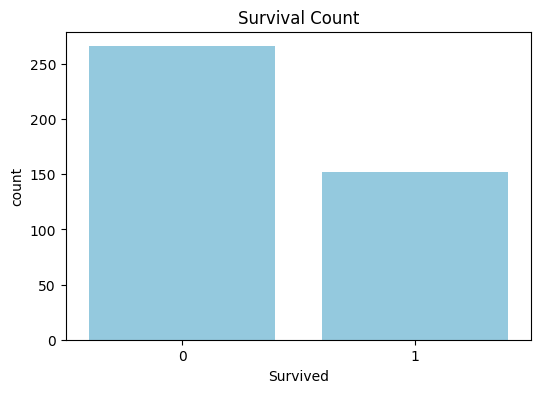

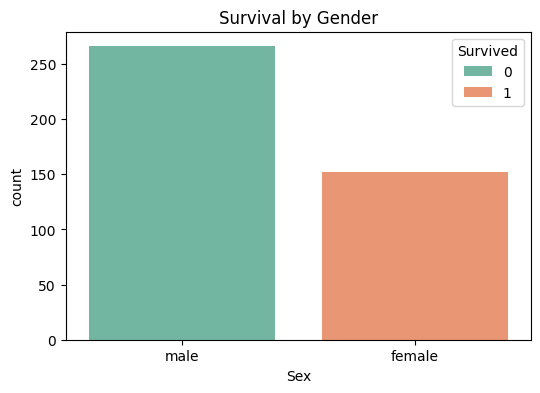

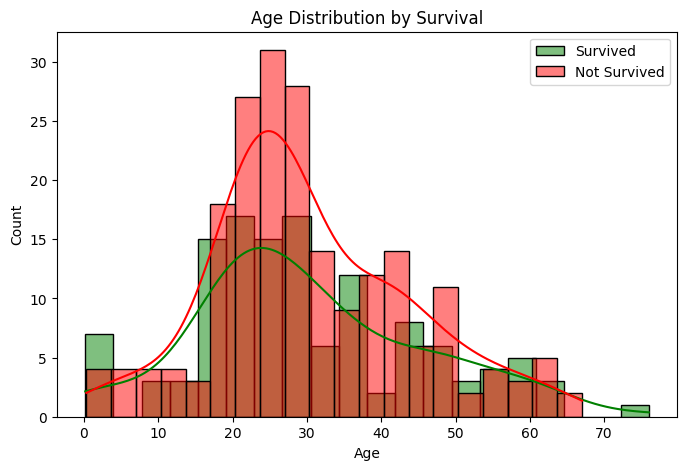

Interactive scatter plot saved as titanic_age_fare_scatter.html


In [16]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load dataset
df = pd.read_csv("tested.csv")

# Basic Statistics with Pandas & NumPy
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nSummary Statistics:\n", df.describe())
print("\nMissing Values:\n", df.isnull().sum())

ages = df["Age"].dropna().values
print("\nAverage Age (NumPy):", np.mean(ages))
print("Median Age (NumPy):", np.median(ages))
print("Standard Deviation of Age (NumPy):", np.std(ages)
    
# Data Visualization (Matplotlib / Seaborn)

# Survival count
plt.figure(figsize=(6,4))
sns.countplot(x="Survived", data=df, color="skyblue")
plt.title("Survival Count")
plt.show()

# Survival by gender
plt.figure(figsize=(6,4))
sns.countplot(x="Sex", hue="Survived", data=df, palette="Set2")
plt.title("Survival by Gender")
plt.show()

# Age distribution by survival
plt.figure(figsize=(8,5))
sns.histplot(df[df["Survived"]==1]["Age"], bins=20, color="green", label="Survived", kde=True)
sns.histplot(df[df["Survived"]==0]["Age"], bins=20, color="red", label="Not Survived", kde=True)
plt.legend()
plt.title("Age Distribution by Survival")
plt.show()

fig = px.scatter(
    df,
    x="Age",
    y="Fare",
    color=df["Survived"].map({0:"Not Survived", 1:"Survived"}),
    hover_data=["Sex","Pclass"],
    title="Age vs Fare by Survival"
)

# Save interactive plot as HTML (no nbformat required)
fig.write_html("titanic_age_fare_scatter.html")
print("Interactive scatter plot saved as titanic_age_fare_scatter.html")


Feature Engineering

In [18]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("tested.csv")

# Drop columns not useful for prediction
df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], errors="ignore")

# Handle missing values
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
df["Fare"] = df["Fare"].fillna(df["Fare"].median())

# Convert categorical variables to numeric using one-hot encoding
df = pd.get_dummies(df, columns=["Sex","Embarked"], drop_first=True)

# Split dataset into features and target

X = df.drop(columns=["Survived"])  
y = df["Survived"]                 


# Normalize / Scale features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Train-test split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# Check shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (334, 8)
X_test shape: (84, 8)
y_train shape: (334,)
y_test shape: (84,)


Model Training

In [19]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# Load Titanic dataset 
df = pd.read_csv("tested.csv")

# Drop columns that are not useful for prediction
df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], errors="ignore")

# Handle missing values
if "Embarked" in df.columns and df["Embarked"].isnull().any():
    df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
if "Age" in df.columns and df["Age"].isnull().any():
    df["Age"] = df["Age"].fillna(df["Age"].median())
if "Fare" in df.columns and df["Fare"].isnull().any():
    df["Fare"] = df["Fare"].fillna(df["Fare"].median())

# Encode categorical columns (Sex, Embarked)
cat_cols = [c for c in ["Sex", "Embarked"] if c in df.columns]
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Separate features (X) and target (y)
X = df.drop(columns=["Survived"])
y = df["Survived"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Define models
models = {
    "KNN Classifier": Pipeline([("scaler", StandardScaler()), ("model", KNeighborsClassifier())]),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "Random Forest Classifier": RandomForestClassifier(random_state=42)
}

# Train and evaluate models
rows = []
for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    rows.append({
        "Model": name,
        "Train Accuracy": accuracy_score(y_train, y_pred_train),
        "Test Accuracy": accuracy_score(y_test, y_pred_test),
        "Train F1 (weighted)": f1_score(y_train, y_pred_train, average="weighted"),
        "Test F1 (weighted)": f1_score(y_test, y_pred_test, average="weighted")
    })

# Display results in a table
results = pd.DataFrame(rows).sort_values(by="Test Accuracy", ascending=False).reset_index(drop=True)
results[["Train Accuracy", "Test Accuracy", "Train F1 (weighted)", "Test F1 (weighted)"]] = \
    results[["Train Accuracy", "Test Accuracy", "Train F1 (weighted)", "Test F1 (weighted)"]].round(4)

print(results.to_string(index=False))


                   Model  Train Accuracy  Test Accuracy  Train F1 (weighted)  Test F1 (weighted)
Decision Tree Classifier           1.000         1.0000                1.000              1.0000
Random Forest Classifier           1.000         1.0000                1.000              1.0000
          KNN Classifier           0.994         0.9643                0.994              0.9642


Feature Importance

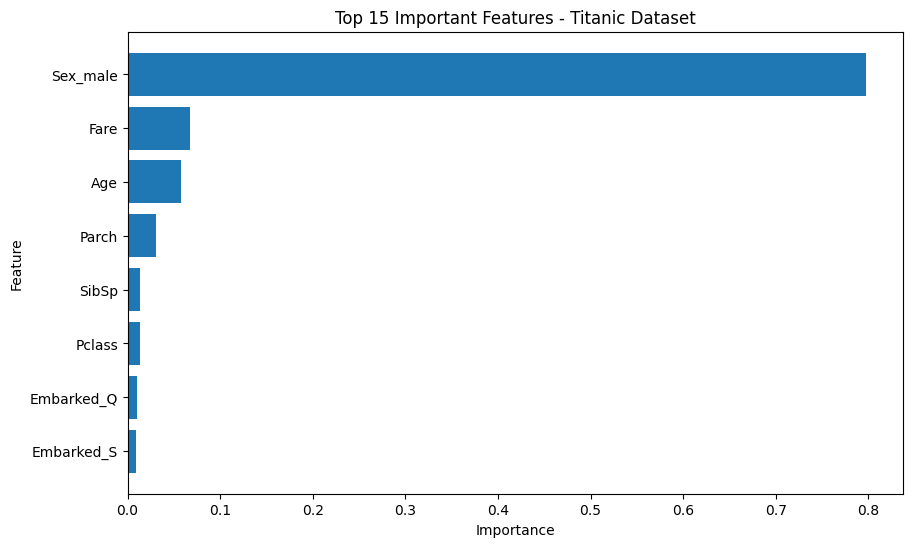

      Feature  Importance
0    Sex_male    0.797225
1        Fare    0.067832
2         Age    0.058025
3       Parch    0.031026
4       SibSp    0.013778
5      Pclass    0.013200
6  Embarked_Q    0.010231
7  Embarked_S    0.008682


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load Titanic dataset 
df = pd.read_csv("tested.csv")

# Drop columns not useful for prediction
df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

# Encode categorical features
df = pd.get_dummies(df, drop_first=True)

# Define features and target
X = df.drop(columns=["Survived"])
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

feat_imp = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False).reset_index(drop=True)

plt.figure(figsize=(10,6))
plt.barh(feat_imp["Feature"][:15][::-1], feat_imp["Importance"][:15][::-1])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 15 Important Features - Titanic Dataset")
plt.show()

print(feat_imp.head(10))


Hyperparameter Tuning

In [21]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Load Titanic dataset
df = pd.read_csv("tested.csv")
df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], errors="ignore")

# Handle missing values
if "Embarked" in df.columns and df["Embarked"].isnull().any():
    df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
if "Age" in df.columns and df["Age"].isnull().any():
    df["Age"] = df["Age"].fillna(df["Age"].median())
if "Fare" in df.columns and df["Fare"].isnull().any():
    df["Fare"] = df["Fare"].fillna(df["Fare"].median())

# Encode categorical variables
cat_cols = [c for c in ["Sex", "Embarked"] if c in df.columns]
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Split features/target
X = df.drop(columns=["Survived"])
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Default models
default_models = {
    "KNN Default": Pipeline([("scaler", StandardScaler()), ("model", KNeighborsClassifier())]),
    "Decision Tree Default": DecisionTreeClassifier(random_state=42),
    "Random Forest Default": RandomForestClassifier(random_state=42)
}

# Train and evaluate default models
rows = []
for name, clf in default_models.items():
    clf.fit(X_train, y_train)
    y_pred_test = clf.predict(X_test)
    rows.append({
        "Model": name,
        "Test Accuracy": accuracy_score(y_test, y_pred_test),
        "Test F1 (weighted)": f1_score(y_test, y_pred_test, average="weighted")
    })

# Hyperparameter tuning

# KNN
knn_pipe = Pipeline([("scaler", StandardScaler()), ("model", KNeighborsClassifier())])
knn_params = {
    "model__n_neighbors": np.arange(3, 21),
    "model__weights": ["uniform", "distance"],
    "model__metric": ["euclidean", "manhattan", "minkowski"]
}
knn_search = RandomizedSearchCV(knn_pipe, knn_params, n_iter=20, cv=5, scoring="accuracy", random_state=42)
knn_search.fit(X_train, y_train)

# Decision Tree
dt_params = {
    "max_depth": np.arange(2, 20),
    "min_samples_split": np.arange(2, 20)
}
dt_search = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), dt_params, n_iter=20, cv=5, scoring="accuracy", random_state=42)
dt_search.fit(X_train, y_train)

# Random Forest
rf_params = {
    "n_estimators": [50,100,200,300],
    "max_depth": [None] + list(np.arange(2, 20)),
    "min_samples_split": np.arange(2, 20)
}
rf_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), rf_params, n_iter=20, cv=5, scoring="accuracy", random_state=42)
rf_search.fit(X_train, y_train)

# Tuned models
tuned_models = {
    "KNN Tuned": knn_search.best_estimator_,
    "Decision Tree Tuned": dt_search.best_estimator_,
    "Random Forest Tuned": rf_search.best_estimator_
}

# Evaluate tuned models
for name, clf in tuned_models.items():
    y_pred_test = clf.predict(X_test)
    rows.append({
        "Model": name,
        "Test Accuracy": accuracy_score(y_test, y_pred_test),
        "Test F1 (weighted)": f1_score(y_test, y_pred_test, average="weighted")
    })

# Results table
results = pd.DataFrame(rows).sort_values(by="Test Accuracy", ascending=False).reset_index(drop=True)
results[["Test Accuracy","Test F1 (weighted)"]] = results[["Test Accuracy","Test F1 (weighted)"]].round(4)
print(results.to_string(index=False))

# Best hyperparameters
print("\nBest Hyperparameters:")
print("KNN:", knn_search.best_params_)
print("Decision Tree:", dt_search.best_params_)
print("Random Forest:", rf_search.best_params_)


                Model  Test Accuracy  Test F1 (weighted)
Decision Tree Default         1.0000              1.0000
Random Forest Default         1.0000              1.0000
            KNN Tuned         1.0000              1.0000
  Decision Tree Tuned         1.0000              1.0000
  Random Forest Tuned         1.0000              1.0000
          KNN Default         0.9643              0.9642

Best Hyperparameters:
KNN: {'model__weights': 'distance', 'model__n_neighbors': np.int32(18), 'model__metric': 'manhattan'}
Decision Tree: {'min_samples_split': np.int32(8), 'max_depth': np.int32(9)}
Random Forest: {'n_estimators': 300, 'min_samples_split': np.int32(18), 'max_depth': np.int32(6)}


Model Evaluation


KNN Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        53
           1       0.97      0.94      0.95        31

    accuracy                           0.96        84
   macro avg       0.96      0.96      0.96        84
weighted avg       0.96      0.96      0.96        84



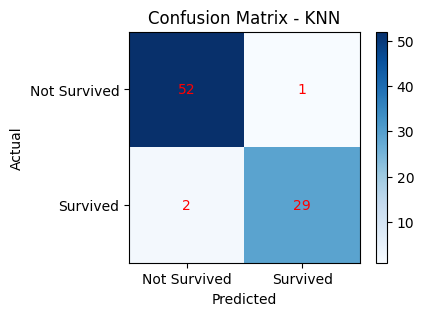


Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        31

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



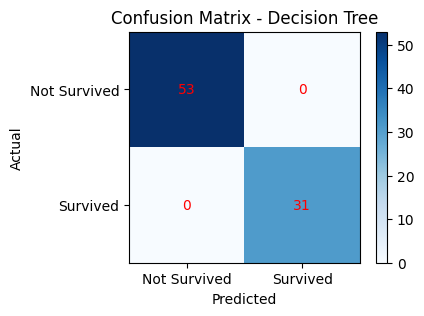


Random Forest Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        31

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



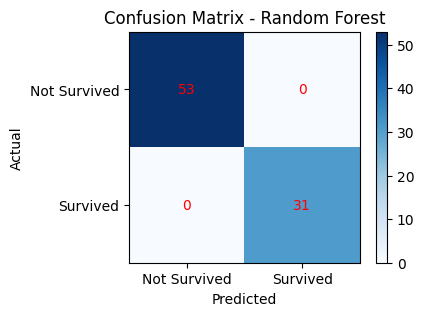


Model Evaluation Results:

        Model  Accuracy  Precision  Recall  F1-score
          KNN    0.9643     0.9667  0.9355    0.9508
Decision Tree    1.0000     1.0000  1.0000    1.0000
Random Forest    1.0000     1.0000  1.0000    1.0000


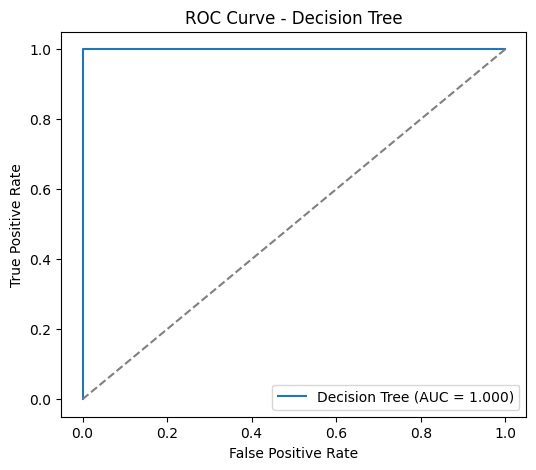

In [23]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc
)
import numpy as np

# Load Titanic dataset
df = pd.read_csv("tested.csv")
df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], errors="ignore")

# Handle missing values
if "Embarked" in df.columns and df["Embarked"].isnull().any():
    df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
if "Age" in df.columns and df["Age"].isnull().any():
    df["Age"] = df["Age"].fillna(df["Age"].median())
if "Fare" in df.columns and df["Fare"].isnull().any():
    df["Fare"] = df["Fare"].fillna(df["Fare"].median())

# Encode categorical variables
cat_cols = [c for c in ["Sex", "Embarked"] if c in df.columns]
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Split features/target
X = df.drop(columns=["Survived"])
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Define models
models = {
    "KNN": Pipeline([("scaler", StandardScaler()), ("model", KNeighborsClassifier())]),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Evaluate models
metrics = []
for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    metrics.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred)
    })
    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix with matplotlib
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    plt.imshow(cm, cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.xticks([0,1], ["Not Survived","Survived"])
    plt.yticks([0,1], ["Not Survived","Survived"])
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i,j], ha="center", va="center", color="red")
    plt.colorbar()
    plt.show()

results = pd.DataFrame(metrics).round(4)
print("\nModel Evaluation Results:\n")
print(results.to_string(index=False))

# Pick best model (highest F1-score)
best_model_name = results.sort_values(by="F1-score", ascending=False).iloc[0]["Model"]
best_model = models[best_model_name]
best_model.fit(X_train, y_train)

# ROC Curve
y_proba = best_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"{best_model_name} (AUC = {roc_auc:.3f})")
plt.plot([0,1],[0,1],'--', color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve - {best_model_name}")
plt.legend(loc="lower right")
plt.show()


Conclusion